In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from feature_engine.imputation import RandomSampleImputer
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [3]:
data = pd.read_csv('data/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
numerical = data.select_dtypes(include=np.number)
categorical = data.select_dtypes(np.object)

numerical.shape, categorical.shape

((145460, 16), (145460, 7))

In [5]:
numerical.isna().mean()

MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustSpeed    0.070555
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
dtype: float64

In [6]:
categorical.isna().mean()

Date            0.000000
Location        0.000000
WindGustDir     0.070989
WindDir9am      0.072639
WindDir3pm      0.029066
RainToday       0.022419
RainTomorrow    0.022460
dtype: float64

# imputation

interpolation for impute numerical values like tempurature, rainfall, evaporation, sunshine with location feature.

In [7]:
categorical['Location'].value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Melbourne           3193
Perth               3193
Brisbane            3193
Hobart              3193
Bendigo             3040
Launceston          3040
GoldCoast           3040
Ballarat            3040
MountGambier        3040
MountGinini         3040
Townsville          3040
Albury              3040
AliceSprings        3040
Albany              3040
Wollongong          3040
Cairns              3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Williamtown         3009
CoffsHarbour        3009
Witchcliffe         3009
WaggaWagga          3009
PerthAirport        3009
Nuriootpa           3009
Woomera             3009
Portland            3009
MelbourneAirport    3009
Moree               3009
PearceRAAF          3009
Cobar               3009
Dartmoor            3009
Watsonia            3009
Richmond            3009
Mildura             3009
SydneyAirport       3009


In [8]:
# impute temperature features
replace_with = data.groupby(by='Location')['MinTemp'].mean().to_dict()
impute = data['Location'].map(replace_with)
temp = np.where(data.MinTemp.isna(),
                impute,
                data.MinTemp)

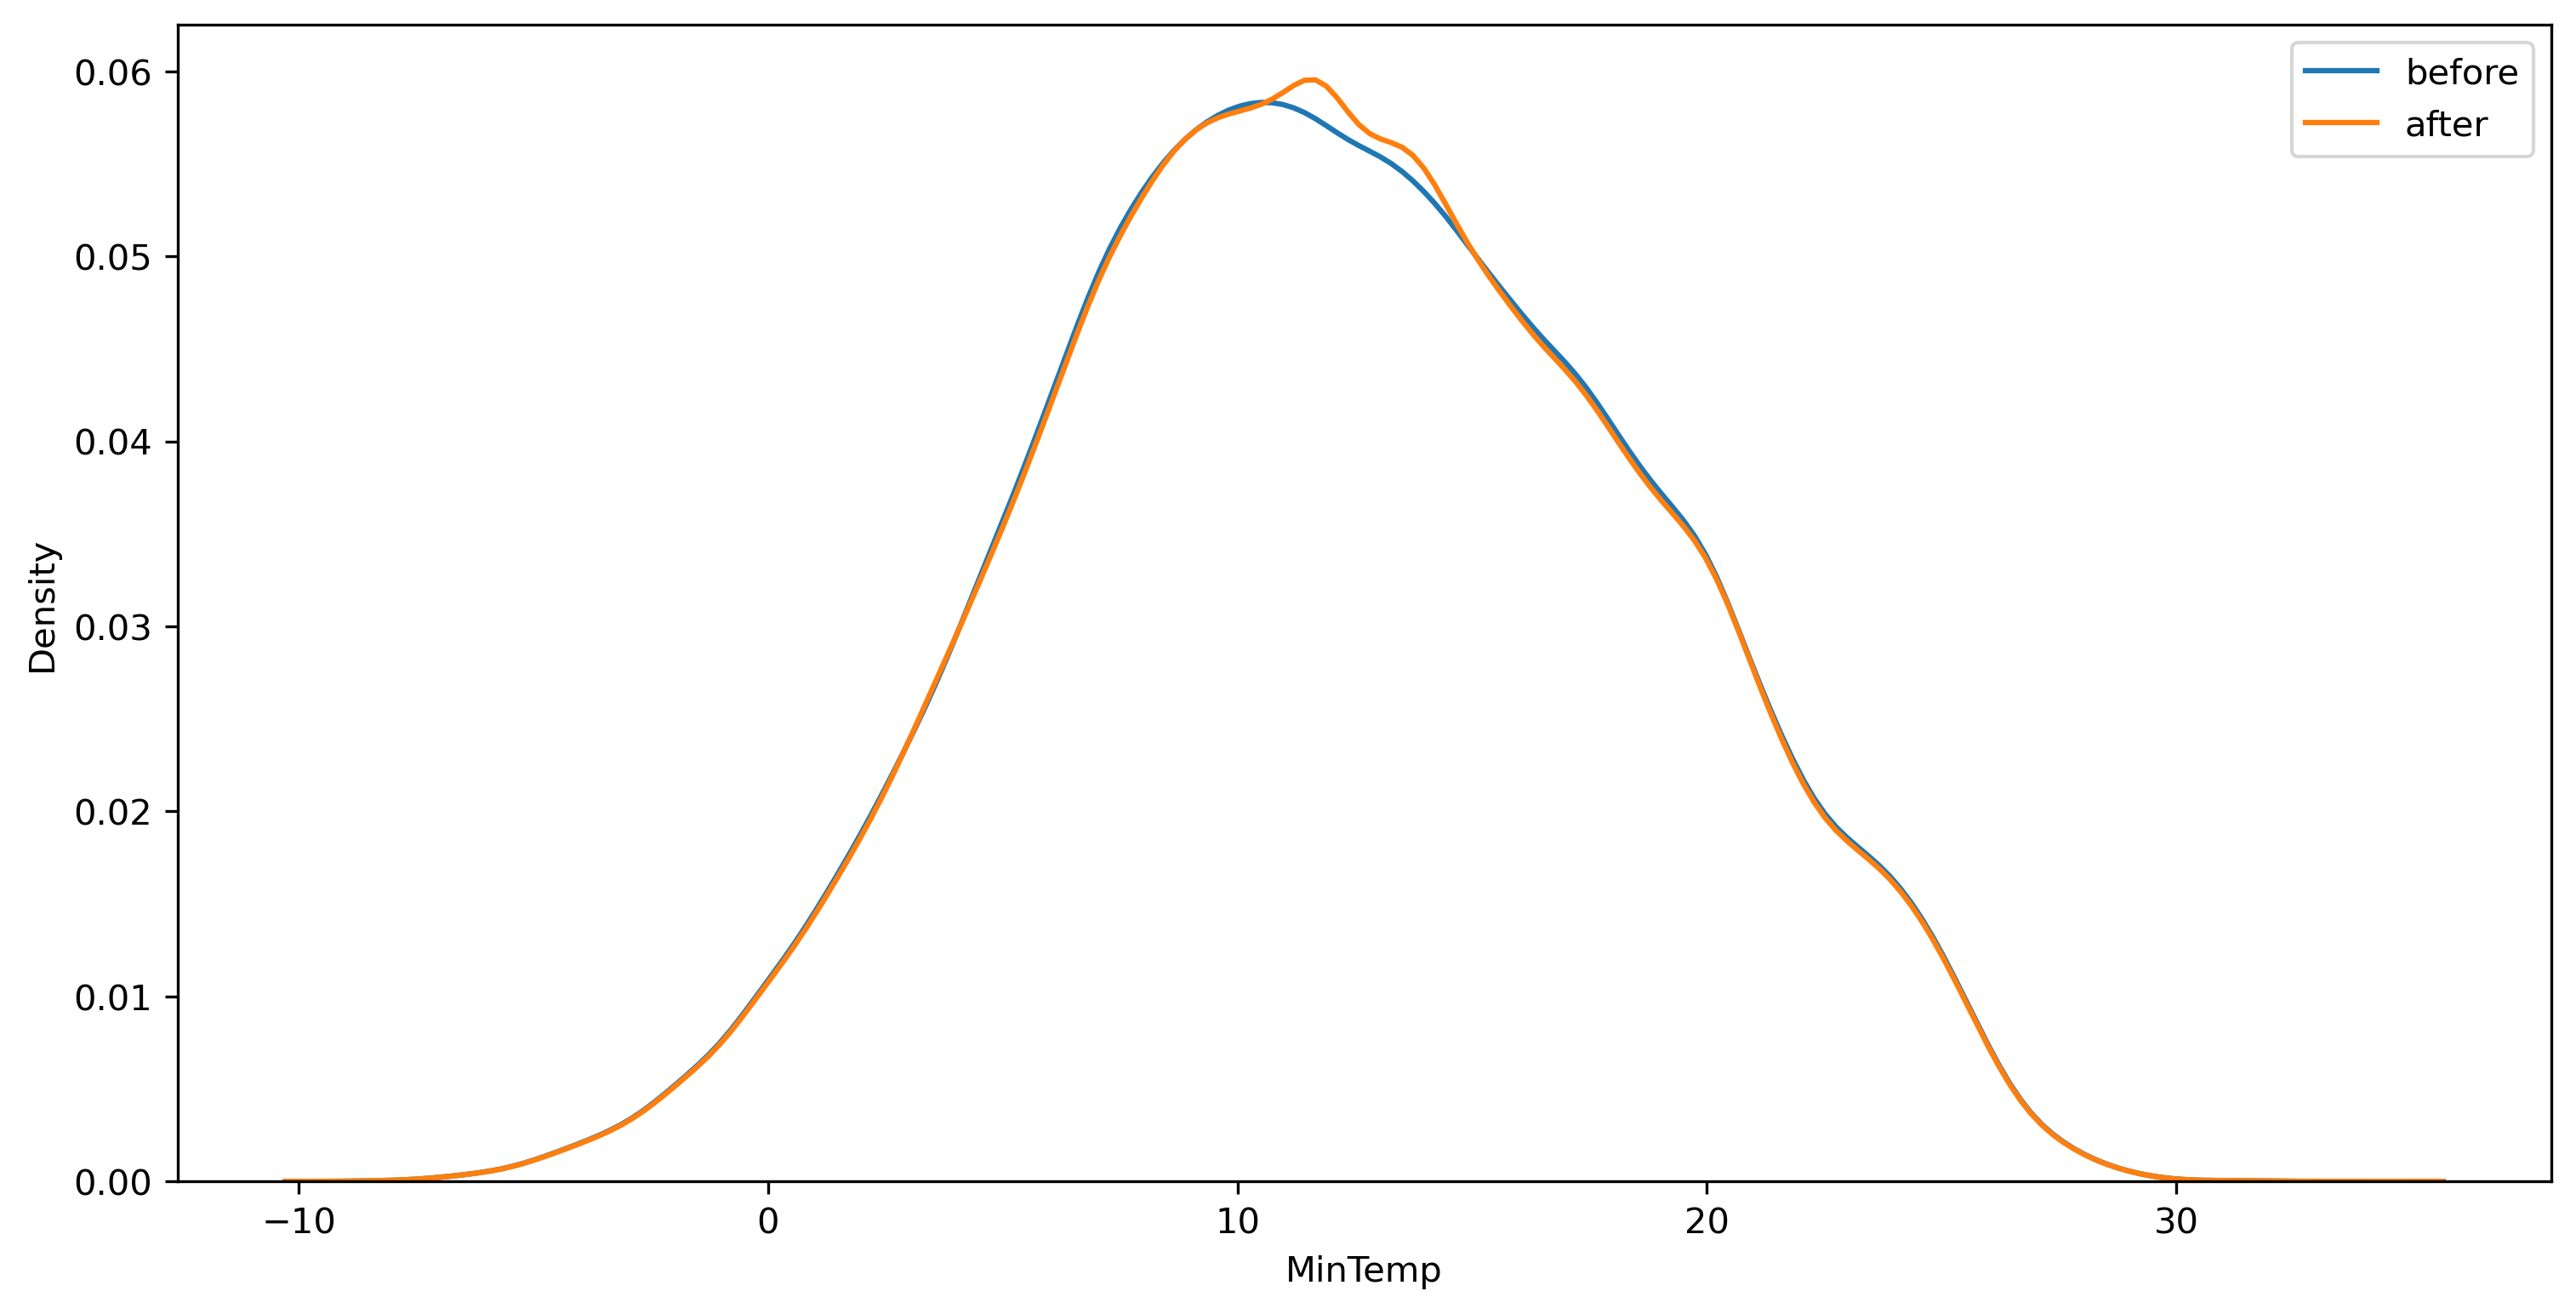

In [9]:
plt.figure(figsize=[12, 6], dpi=300)
sns.kdeplot(data['MinTemp'], label='before')
sns.kdeplot(temp, label='after')
plt.legend()
plt.show()

In [10]:
data['MinTemp'] = temp
data['MinTemp'].isna().sum()

0

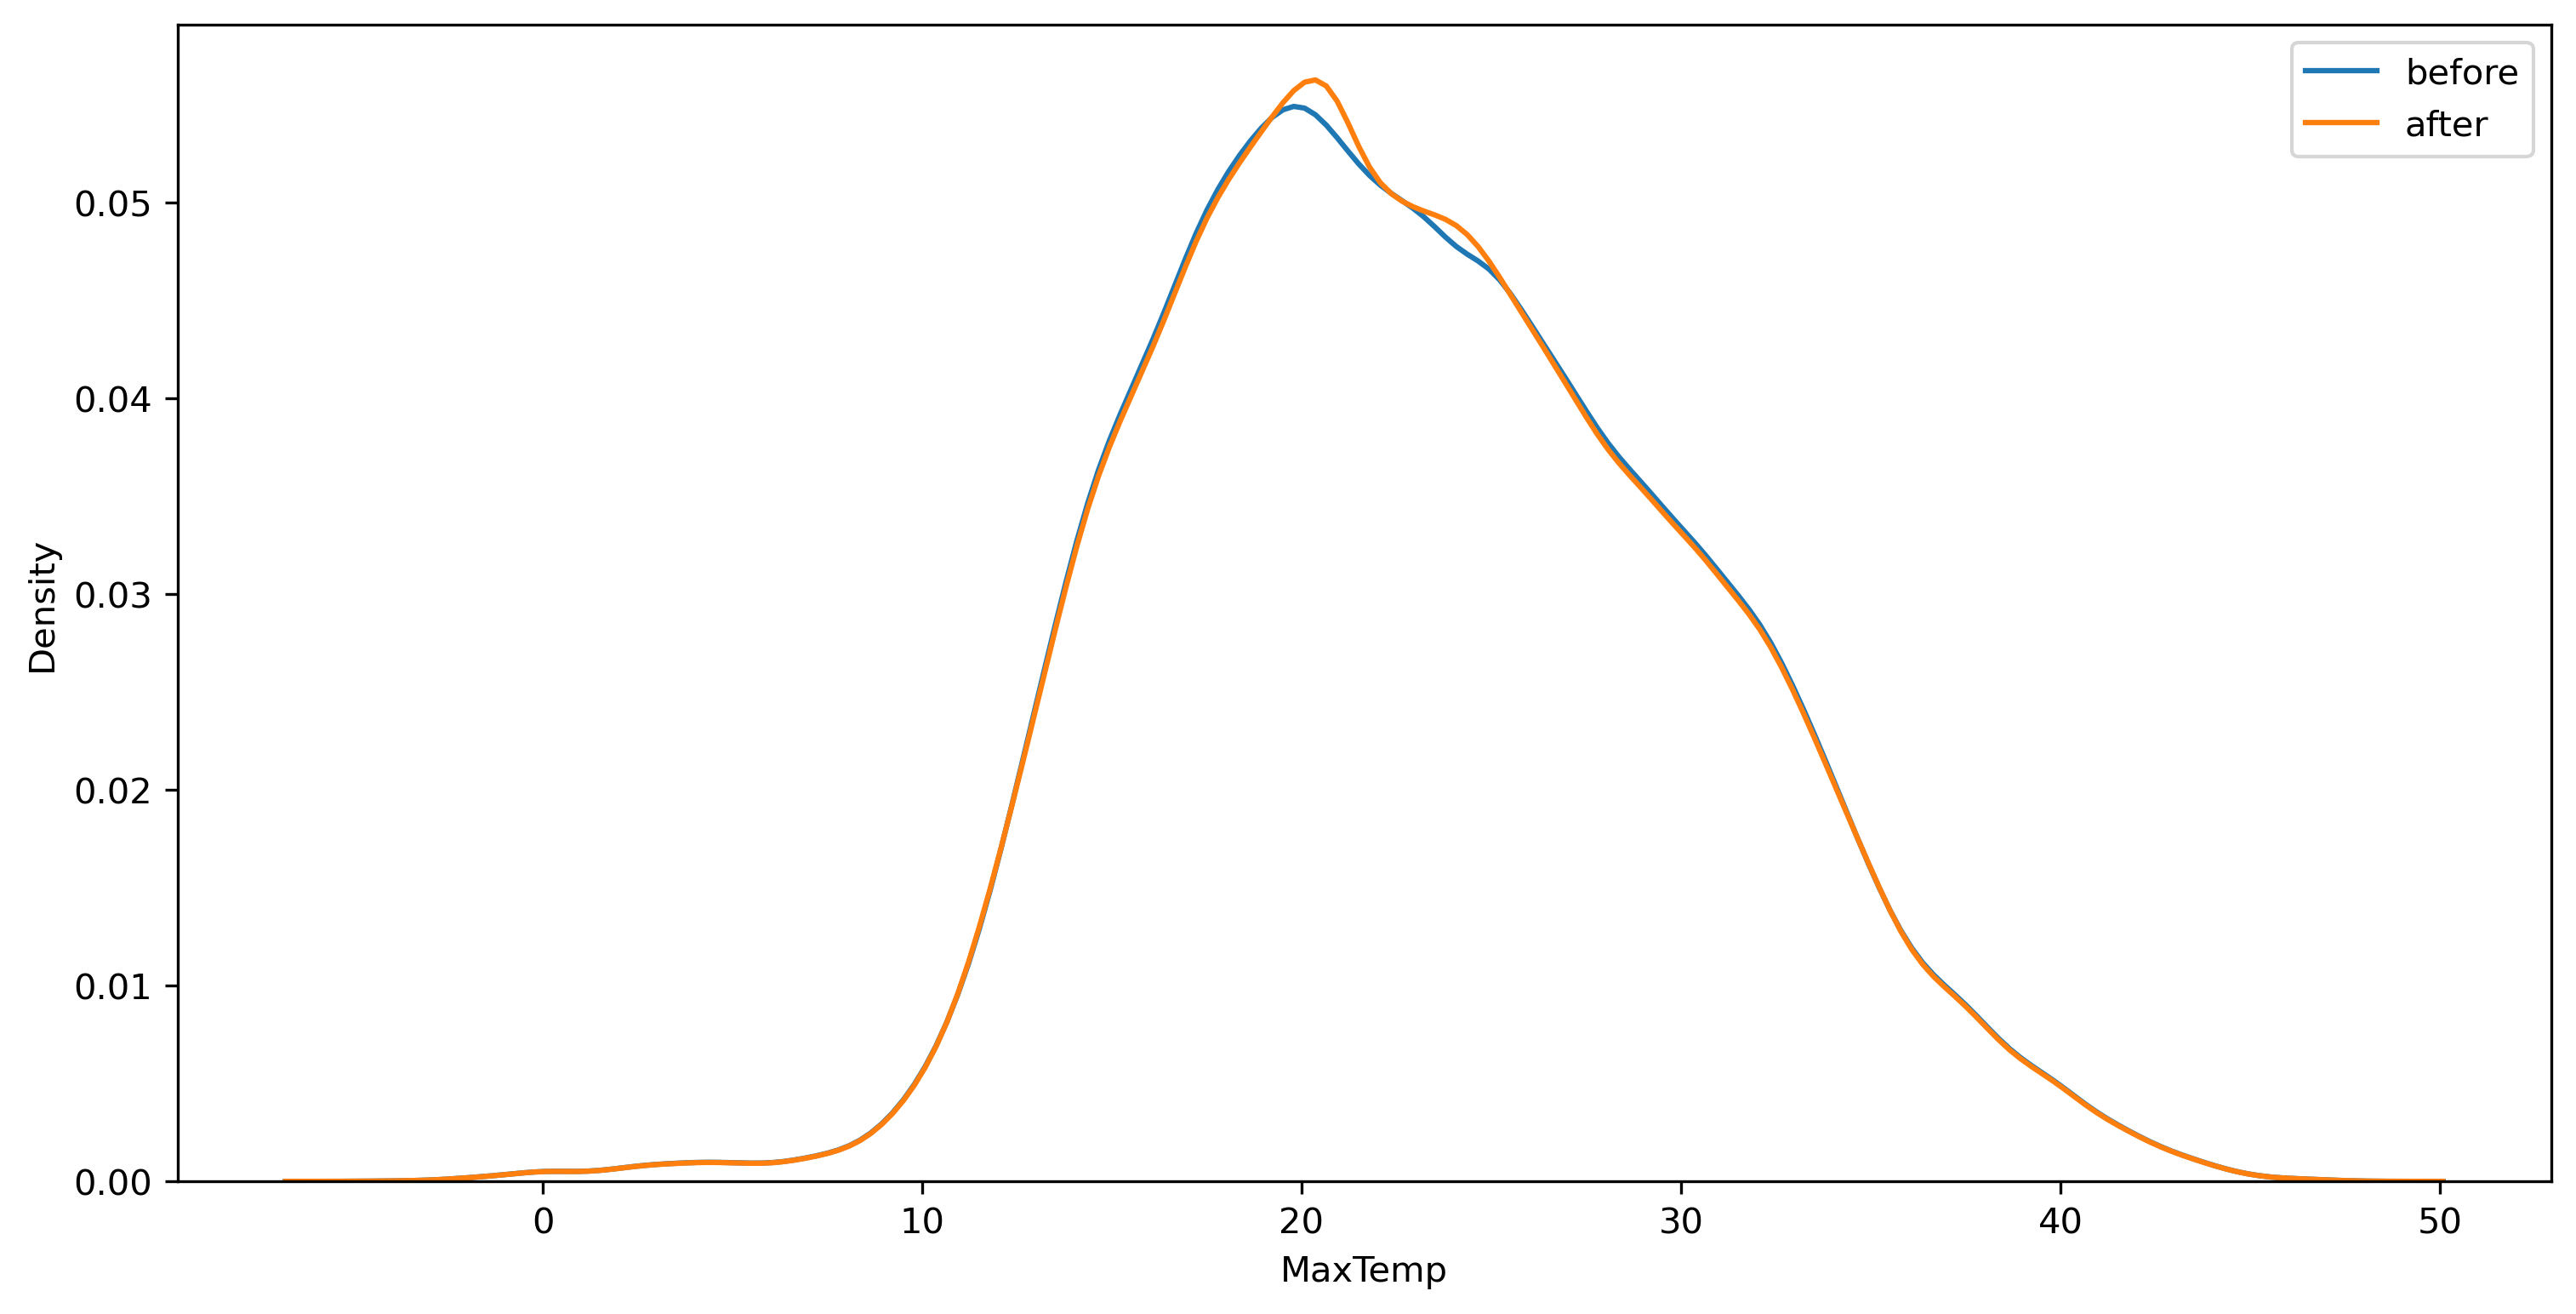

In [11]:
replace_with = data.groupby(by='Location')['MaxTemp'].mean().to_dict()
impute = data['Location'].map(replace_with)
temp = np.where(data.MaxTemp.isna(),
                impute,
                data.MaxTemp)

plt.figure(figsize=[12, 6], dpi=300)
sns.kdeplot(data['MaxTemp'], label='before')
sns.kdeplot(temp, label='after')
plt.legend()
plt.show()

In [12]:
data['MaxTemp'] = temp
data['MaxTemp'].isna().sum()

0

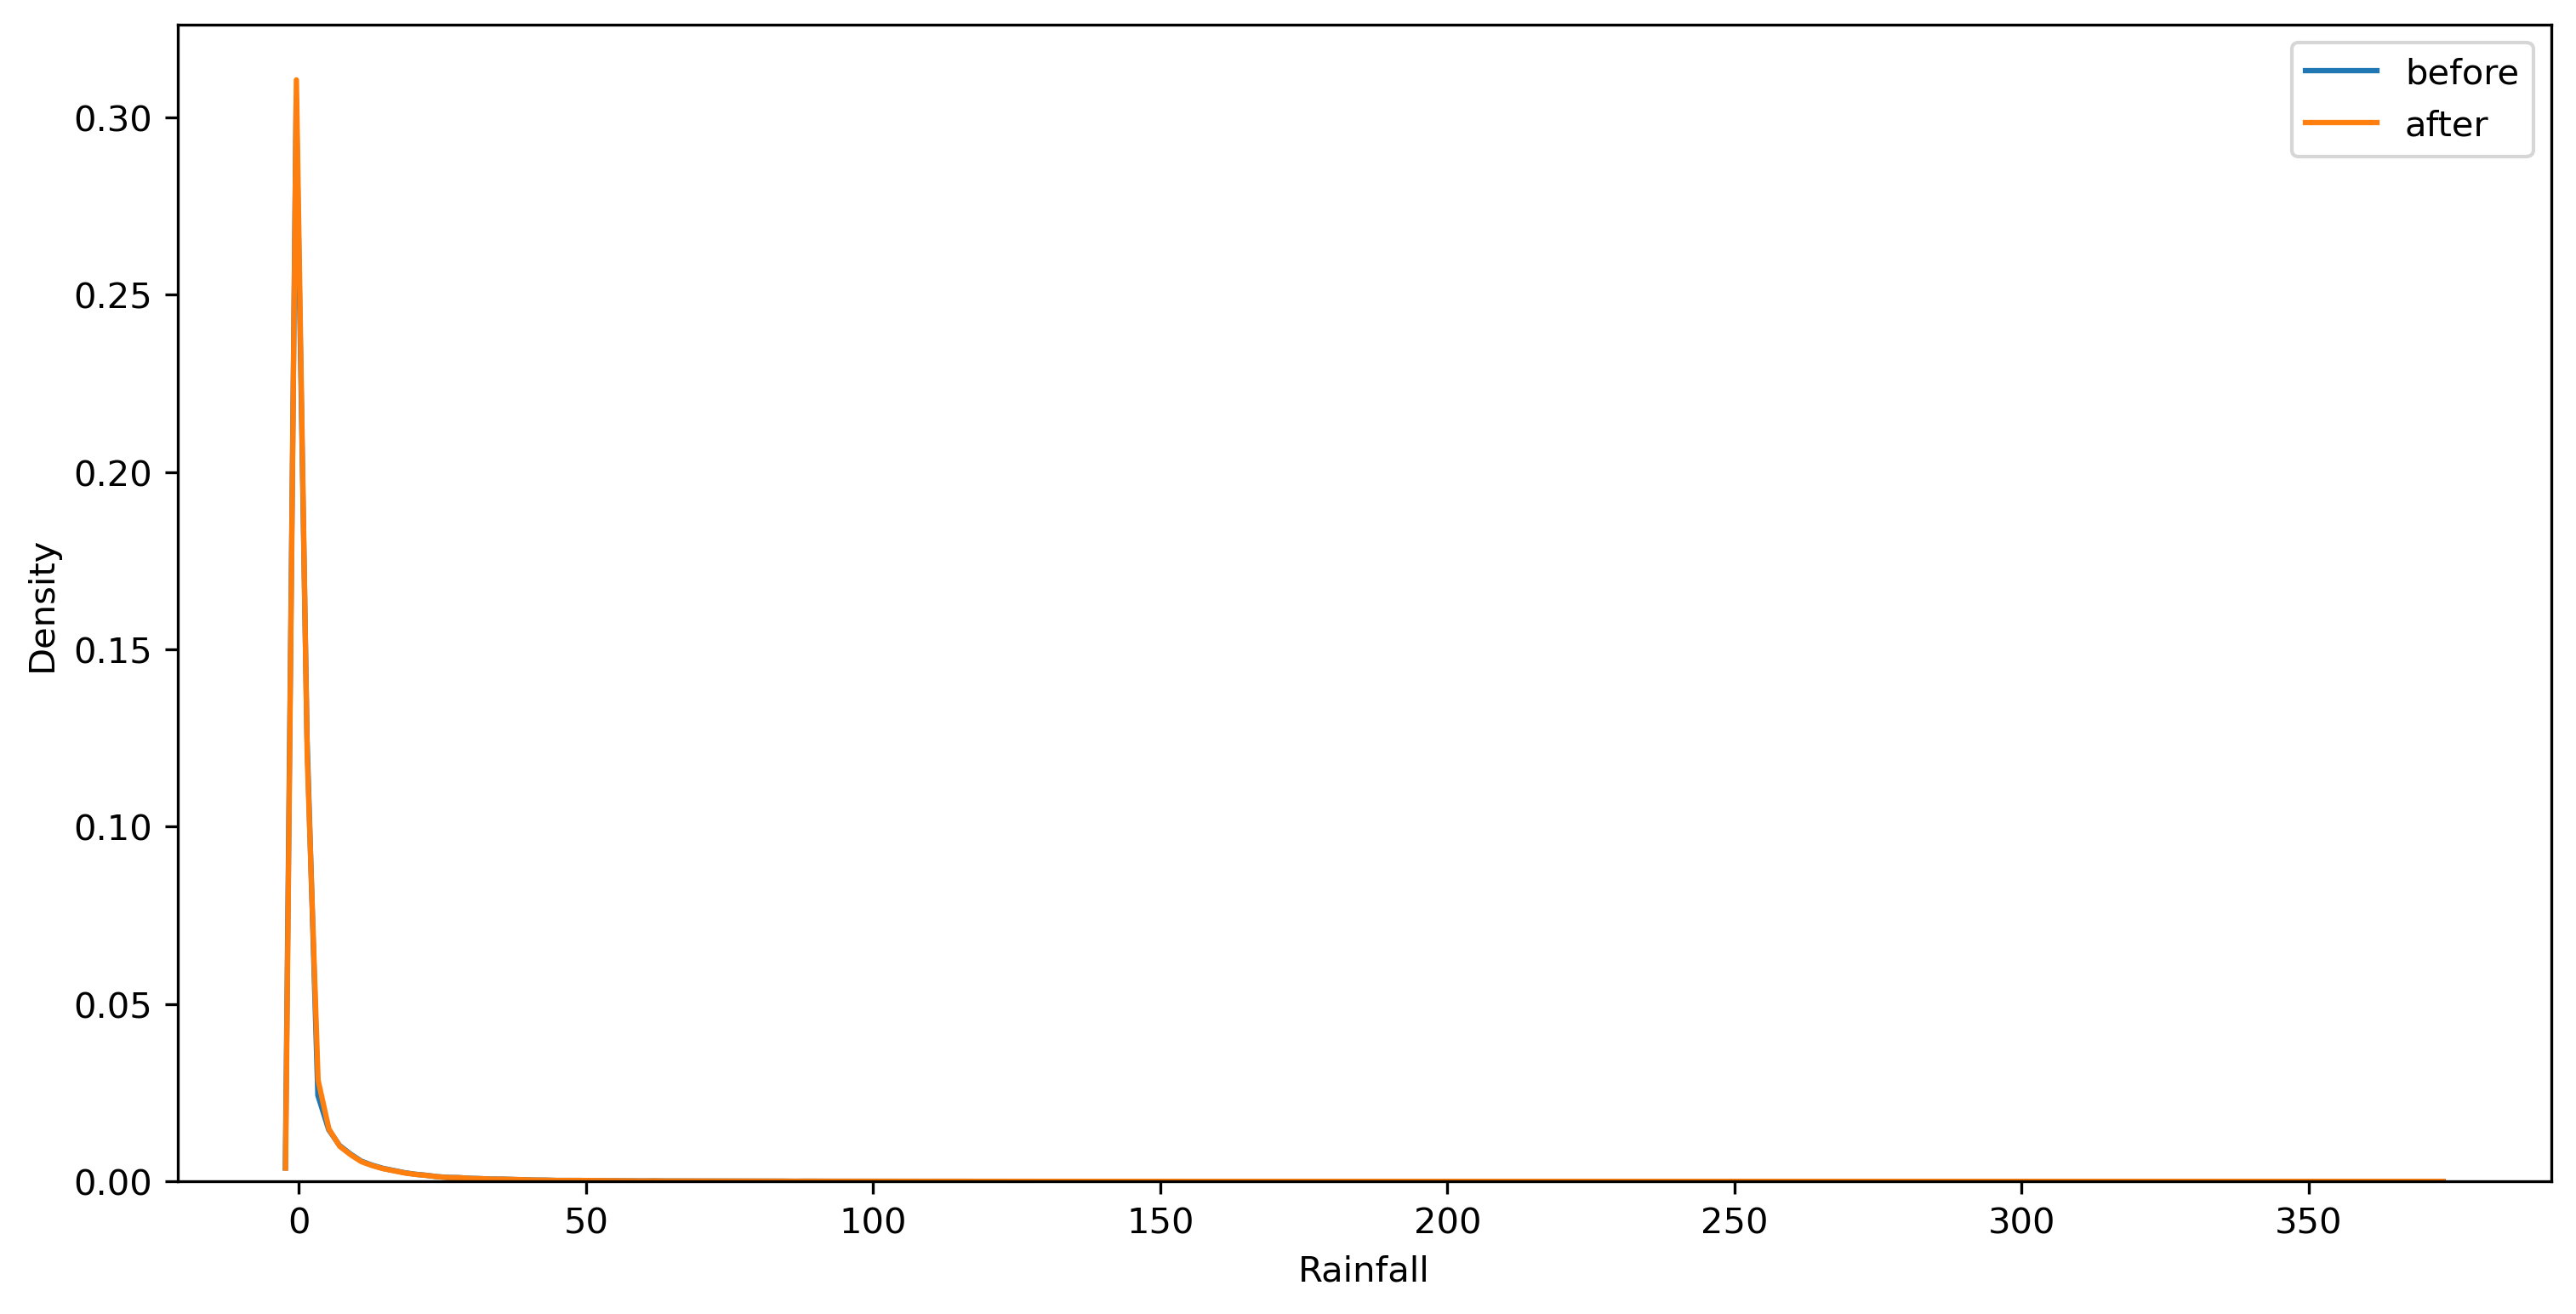

In [13]:
# rainfall feature
replace_with = data.groupby(by='Location')['Rainfall'].mean().to_dict()
impute = data['Location'].map(replace_with)
temp = np.where(data.Rainfall.isna(),
                impute,
                data.Rainfall)

plt.figure(figsize=[12, 6], dpi=300)
sns.kdeplot(data['Rainfall'], label='before')
sns.kdeplot(temp, label='after')
plt.legend()
plt.show()

In [14]:
data['Rainfall'] = temp
data['Rainfall'].isna().sum()

0

In [15]:
# Evaporation,Sunshine,Cloud9am,Cloud3pm feature
imputer = RandomSampleImputer(variables=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm',
                                         'WindSpeed9am', 'WindGustSpeed', 'WindSpeed3pm'],
                              seed='general',
                              seeding_method='add')
imputer.fit(data)

RandomSampleImputer(variables=['Evaporation', 'Sunshine', 'Cloud9am',
                               'Cloud3pm', 'WindSpeed9am', 'WindGustSpeed',
                               'WindSpeed3pm'])

In [16]:
temp = imputer.transform(data)
temp.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

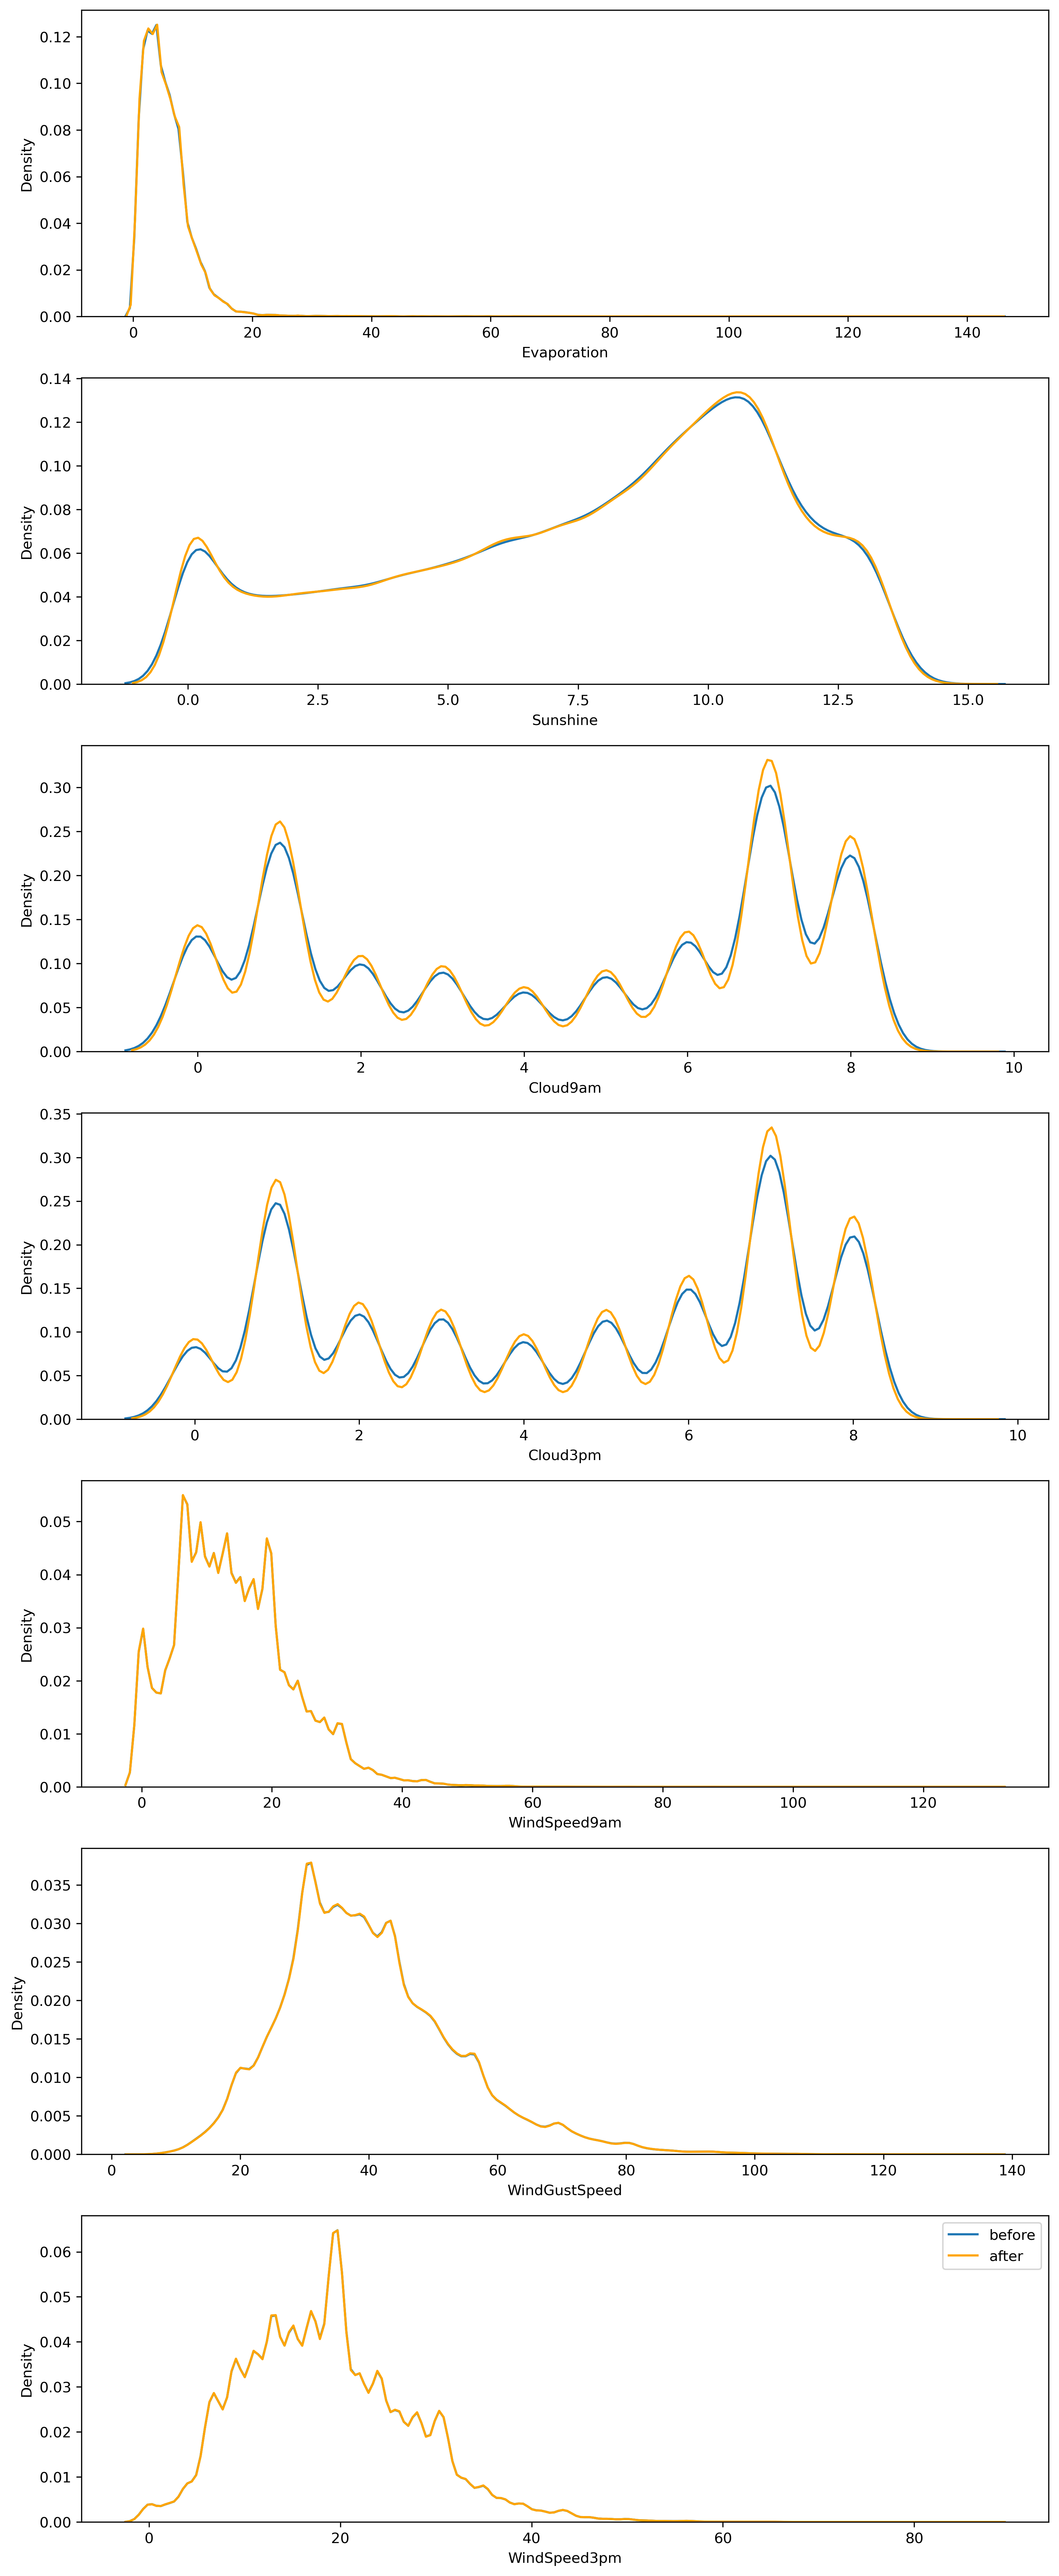

In [17]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=[12, 32], dpi=300)
cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'WindSpeed9am', 'WindGustSpeed', 'WindSpeed3pm']

for i in range(len(cols)):
    sns.kdeplot(data[cols[i]], ax=axes[i], label='before')
    sns.kdeplot(temp[cols[i]], ax=axes[i], label='after', color='orange')

plt.legend()
plt.show()

In [18]:
data.loc[:, cols] = temp.loc[:, cols]
data[cols].isna().sum()

Evaporation      0
Sunshine         0
Cloud9am         0
Cloud3pm         0
WindSpeed9am     0
WindGustSpeed    0
WindSpeed3pm     0
dtype: int64

In [19]:
# pressure feature
itt_impute = IterativeImputer(estimator=BayesianRidge(),
                              random_state=0)
itt_impute.fit(data[['Pressure9am', 'Pressure3pm', 'Temp9am',
                     'Temp3pm', 'Humidity3pm', 'Humidity9am']])
temp = itt_impute.transform(data[['Pressure9am', 'Pressure3pm', 'Temp9am',
                                  'Temp3pm', 'Humidity3pm', 'Humidity9am']])

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


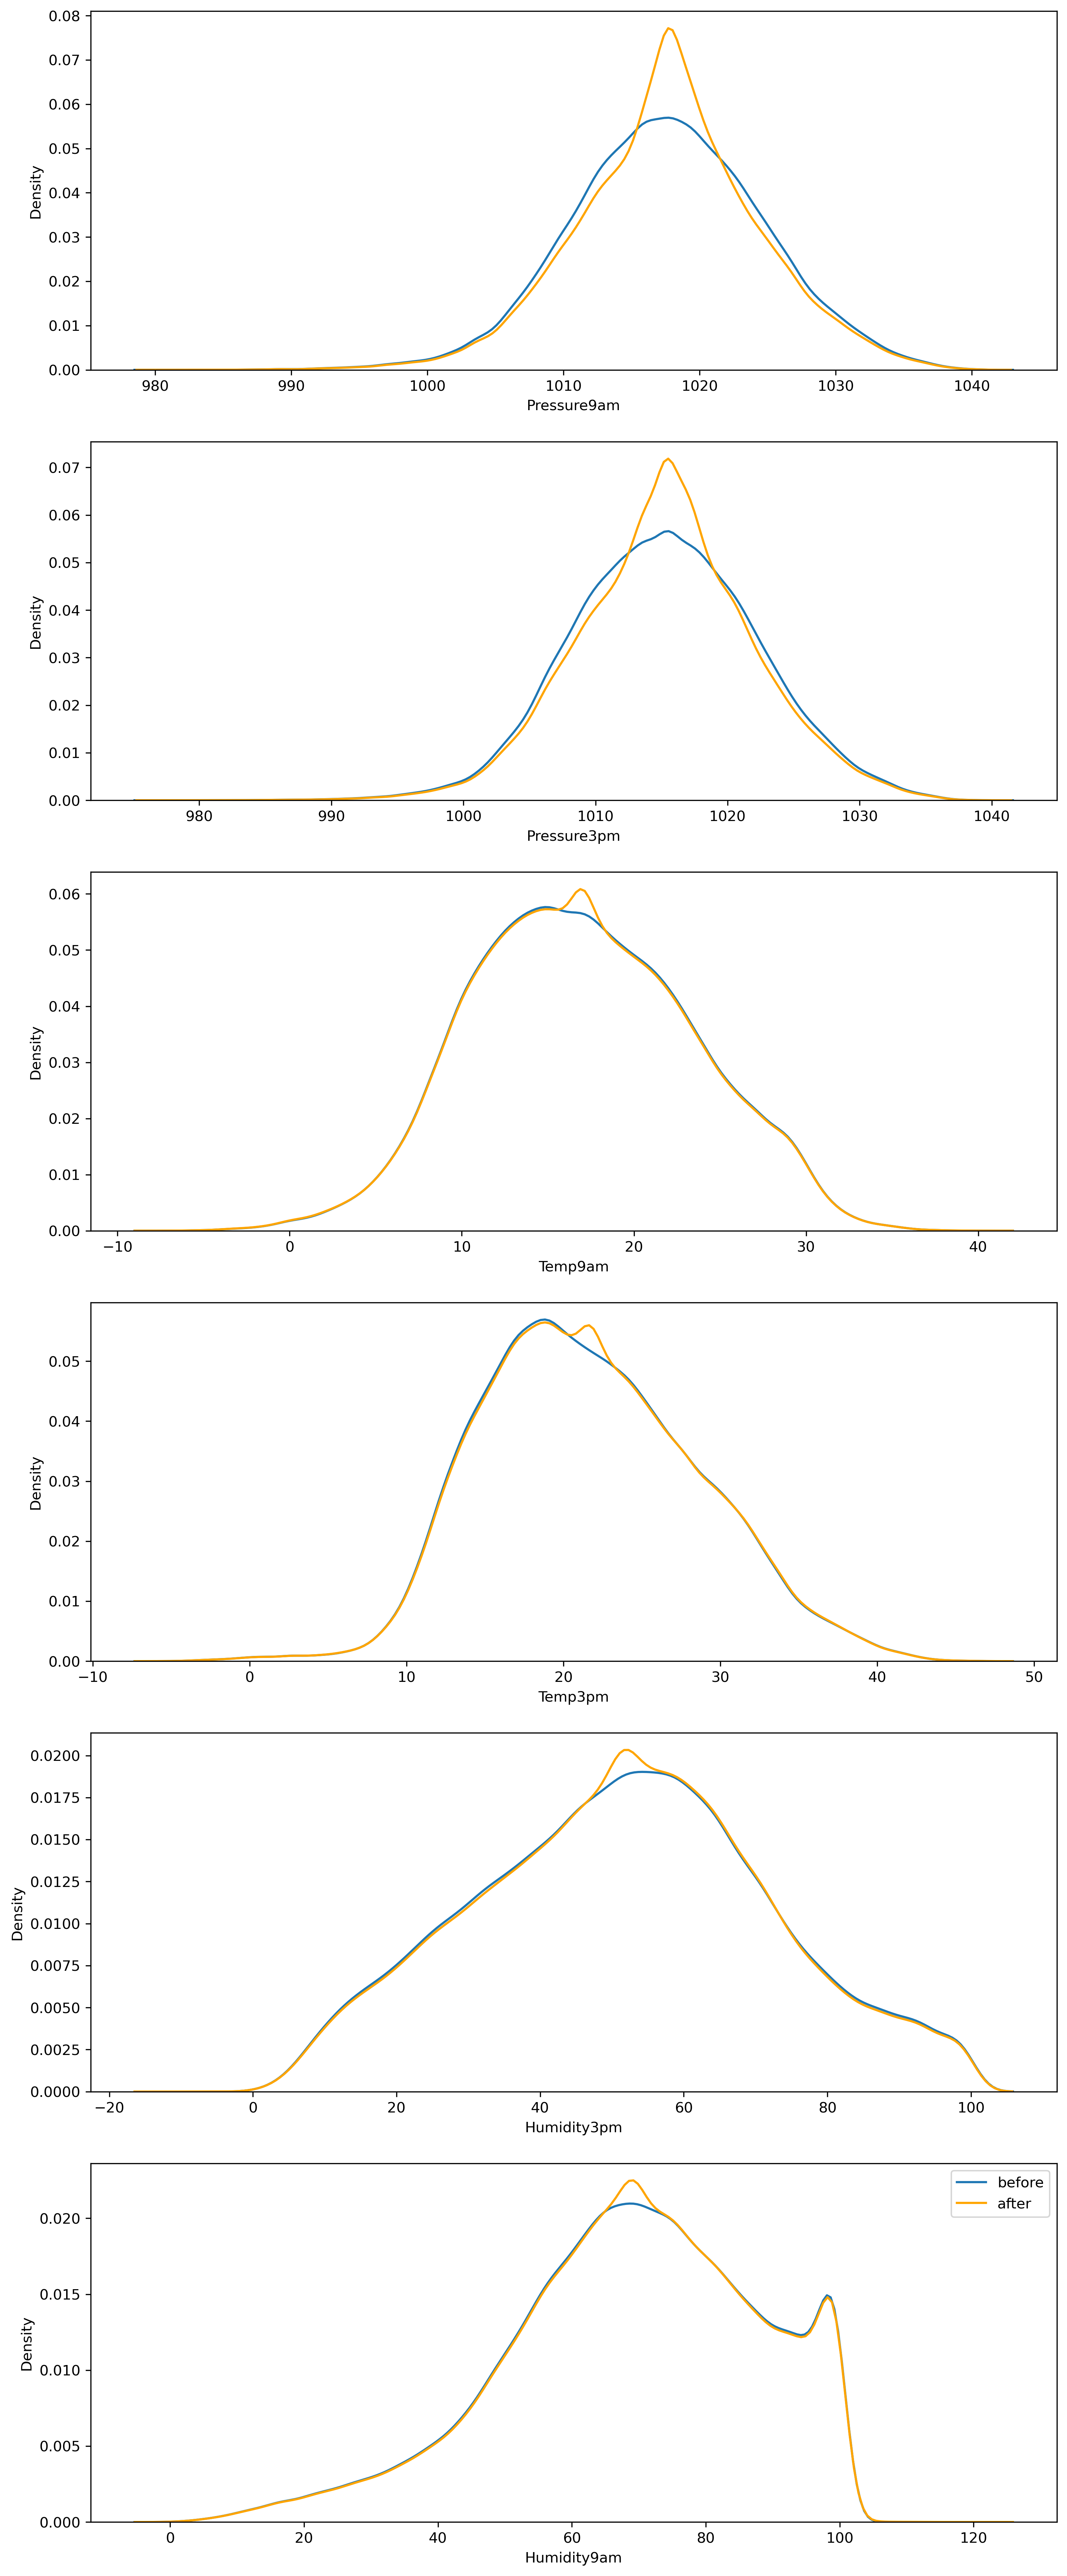

In [20]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=[12, 32], dpi=300)
cols = ['Pressure9am', 'Pressure3pm', 'Temp9am',
        'Temp3pm', 'Humidity3pm', 'Humidity9am']

for i in range(len(cols)):
    sns.kdeplot(data[cols[i]], ax=axes[i], label='before')
    sns.kdeplot(temp[:, i], ax=axes[i], label='after', color='orange')

plt.legend()
plt.show()

In [21]:
data[['Pressure9am', 'Pressure3pm', 'Temp9am',
      'Temp3pm', 'Humidity3pm', 'Humidity9am']] = temp
data[['Pressure9am', 'Pressure3pm', 'Temp9am',
      'Temp3pm', 'Humidity3pm', 'Humidity9am']].isna().sum()

Pressure9am    0
Pressure3pm    0
Temp9am        0
Temp3pm        0
Humidity3pm    0
Humidity9am    0
dtype: int64

In [22]:
data.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [23]:
imputer = RandomSampleImputer(variables=['WindGustDir', 'WindDir9am', 'WindDir3pm',
                                         'RainToday', 'RainTomorrow'],
                              seed='general')
imputer.fit(data)

RandomSampleImputer(variables=['WindGustDir', 'WindDir9am', 'WindDir3pm',
                               'RainToday', 'RainTomorrow'])

In [24]:
temp = imputer.transform(data)
temp.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

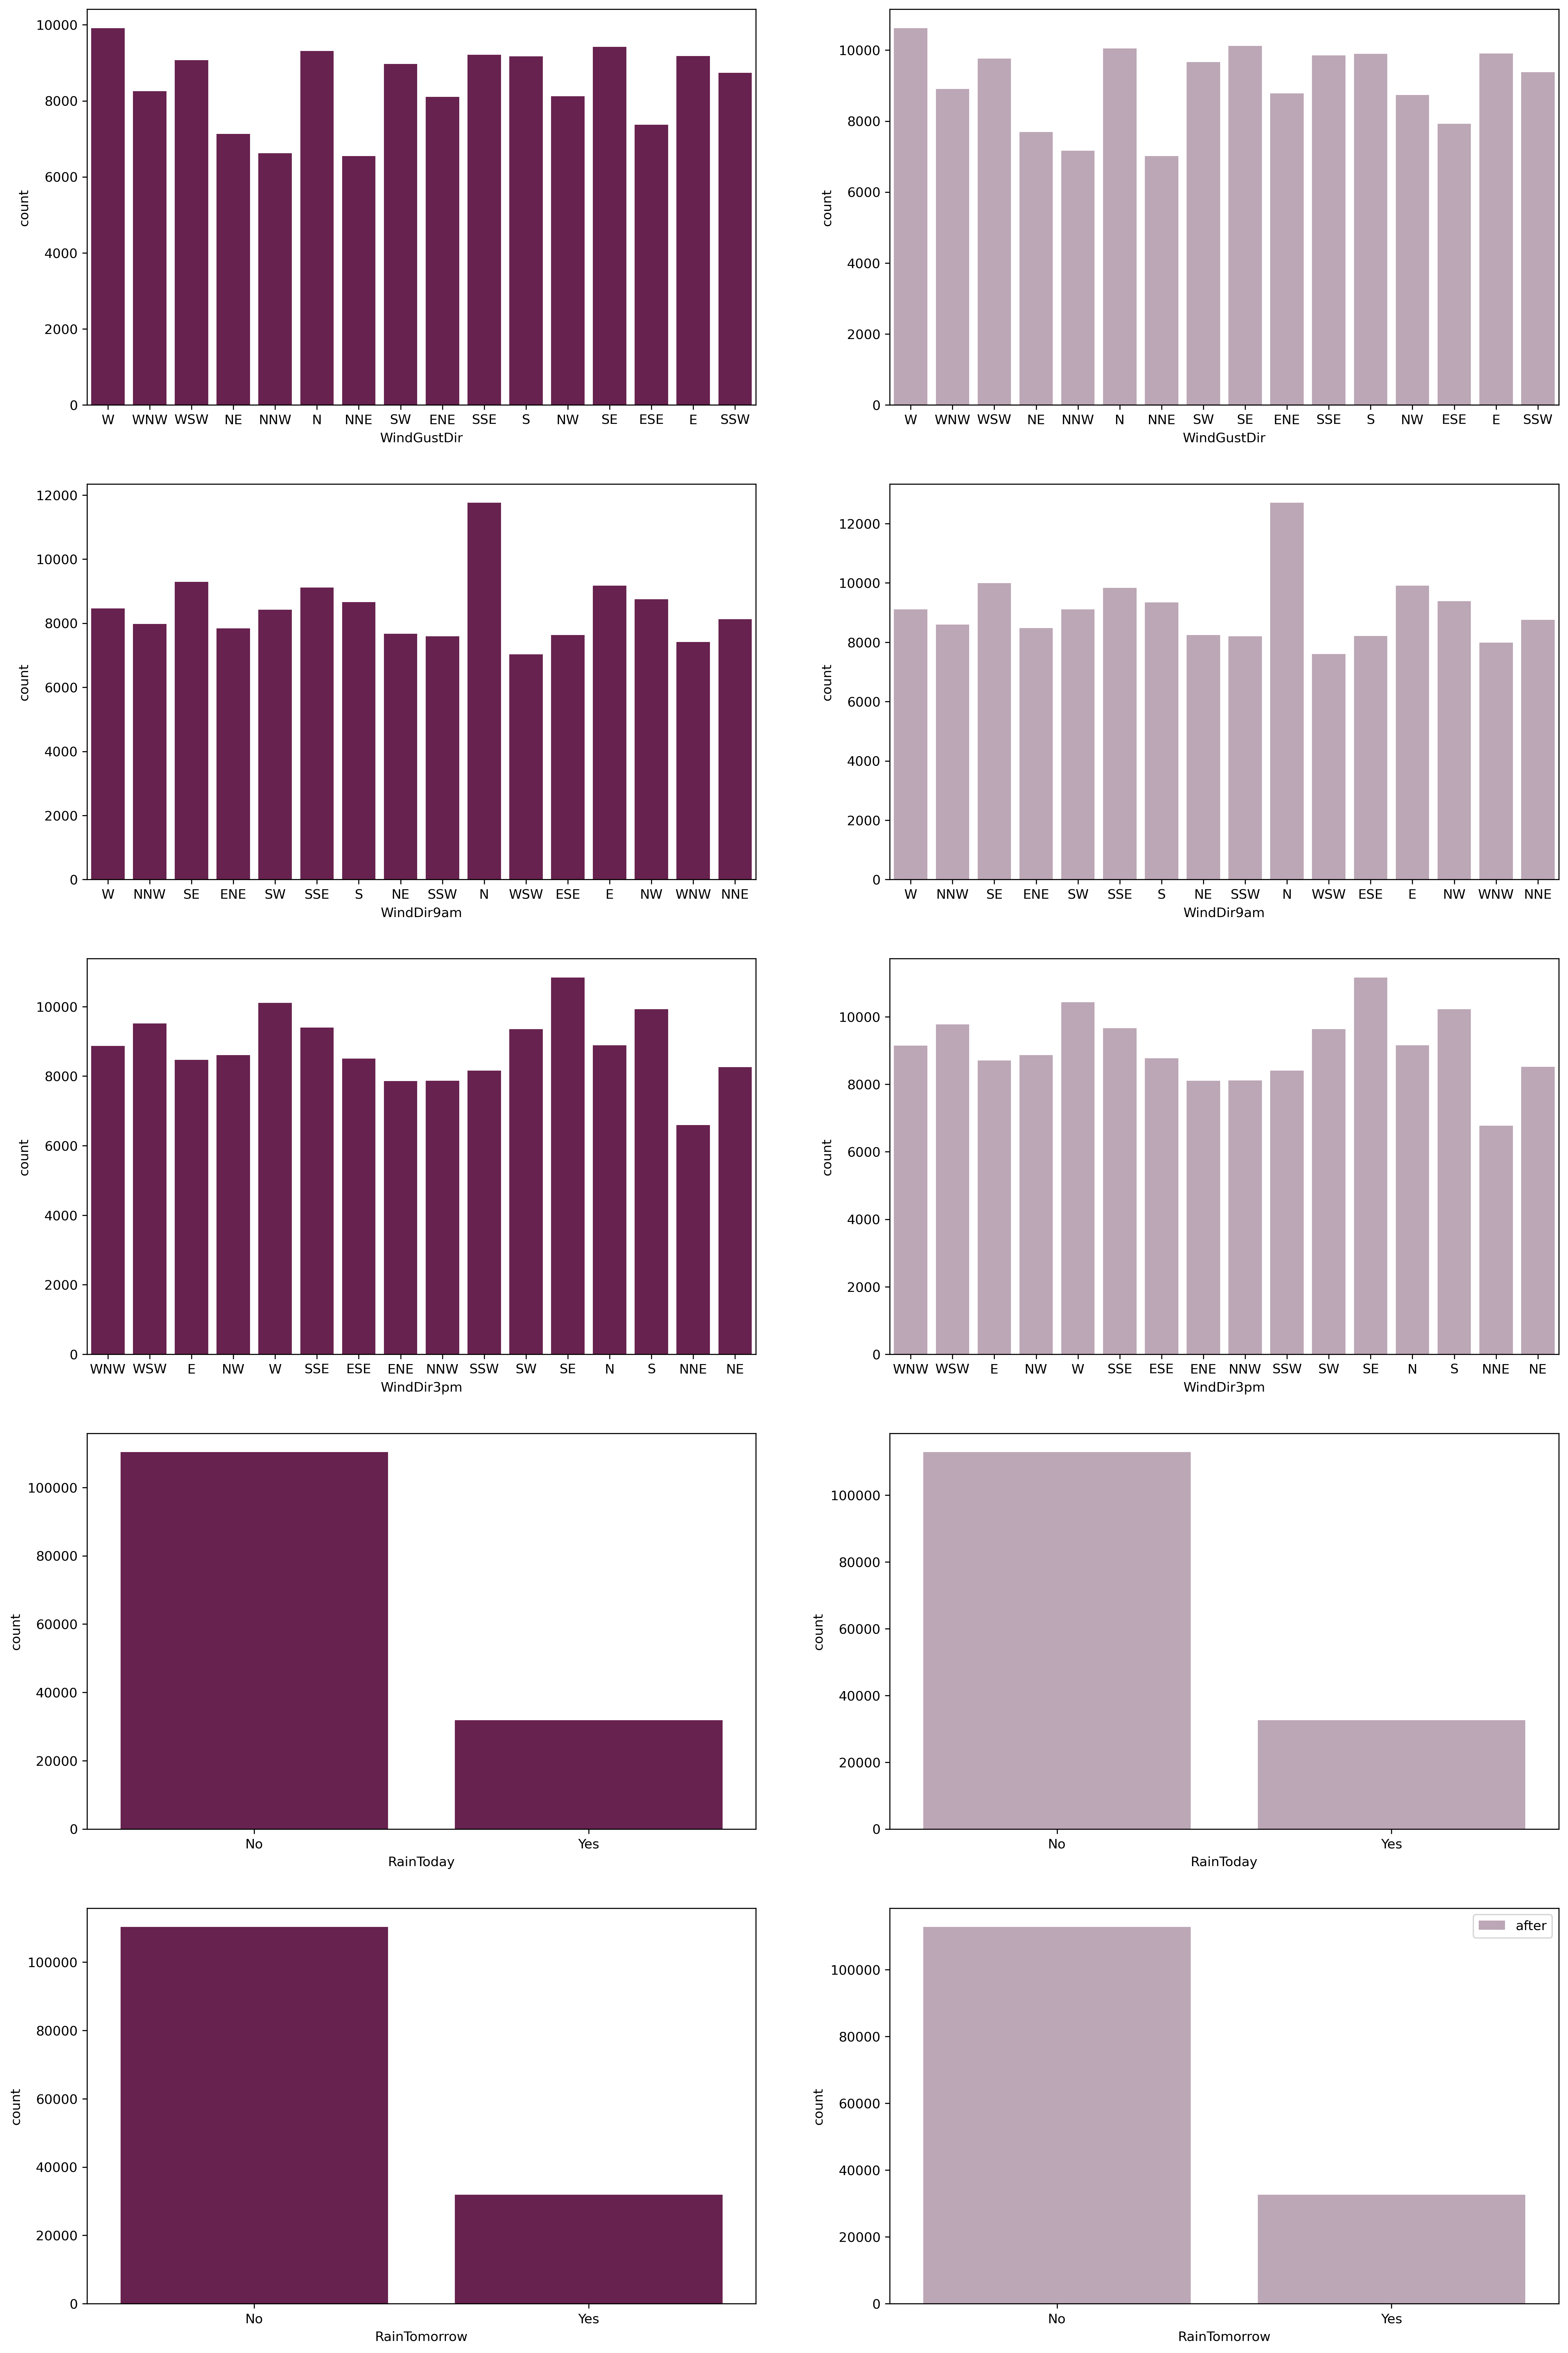

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=[20, 32], dpi=300)
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm',
        'RainToday', 'RainTomorrow']

for i in range(len(cols)):
    sns.countplot(x=data[cols[i]], ax=axes[i, 0], label='before', color='#731753')
    sns.countplot(x=temp[cols[i]], ax=axes[i, 1], label='after', color='#BFA4B8')

plt.legend()
plt.show()

In [26]:
data.loc[:, cols] = temp.loc[:, cols]
data[cols].isna().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [27]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [28]:
categorical.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

### Encoding

decision tree encoding

In [33]:
encoder = CountFrequencyEncoder(variables=['WindGustDir', 'WindDir9am', 'WindDir3pm'],
                                encoding_method='frequency')
encoder.fit(data)
temp = encoder.transform(data)

In [35]:
data.loc[:, ['WindGustDir', 'WindDir9am', 'WindDir3pm']] = temp.loc[:, ['WindGustDir', 'WindDir9am', 'WindDir3pm']]
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,13.2,12.8,0.073030,44.0,0.062650,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,1.2,6.3,0.061240,44.0,0.059109,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,3.2,7.8,0.067118,46.0,0.062650,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,7.0,4.1,0.052887,24.0,0.068720,...,45.0,16.0,1017.6,1012.8,2.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,7.4,10.1,0.073030,41.0,0.058305,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,2.2,11.5,0.068101,31.0,0.068720,...,51.0,24.0,1024.6,1020.3,1.0,7.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,2.8,10.9,0.049237,22.0,0.068720,...,56.0,21.0,1023.5,1019.1,8.0,4.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,7.8,6.1,0.069057,37.0,0.068720,...,53.0,24.0,1021.0,1016.8,7.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,9.2,8.7,0.069545,28.0,0.067599,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [38]:
pd.to_pickle(data,
             'data/aus_weather_cln.pkl')